In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

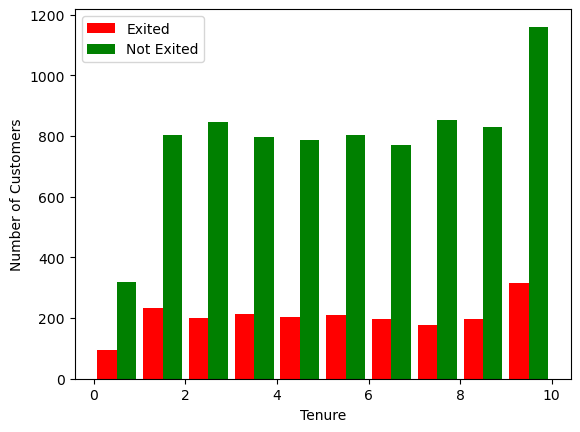

In [8]:
tenure_exited = df[df.Exited == 1].Tenure
tenure_not_exited = df[df.Exited == 0].Tenure


plt.hist([tenure_exited, tenure_not_exited], rwidth=0.85, color=['red', 'green'], label=['Exited', 'Not Exited'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.legend()

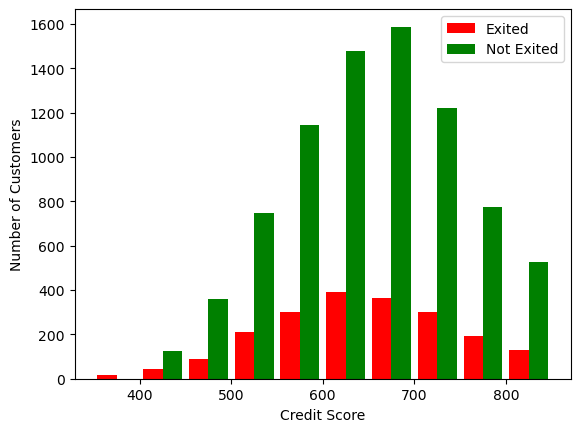

In [9]:
CreditScore_exited = df[df.Exited == 1].CreditScore
CreditScore_not_exited = df[df.Exited == 0].CreditScore


plt.hist([CreditScore_exited, CreditScore_not_exited], rwidth=0.85, color=['red', 'green'], label=['Exited', 'Not Exited'])
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.legend()

In [10]:
for column in df:
    print(f'{column}: {df[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [11]:
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df1 = pd.get_dummies(df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [13]:
df1 = df1[df1.Balance >= 10000]

df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000,6382.000000
mean,651.122532,0.547477,39.197587,4.980414,119845.679127,1.385929,0.699154,0.513632,100705.389953,0.240677,0.406612,0.393137,0.200251
std,96.933815,0.497780,10.477024,2.909074,30062.320814,0.577005,0.458662,0.499853,57376.851430,0.427528,0.491240,0.488485,0.400219
min,350.000000,0.000000,18.000000,0.000000,12459.190000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,2.000000,100198.862500,1.000000,0.000000,0.000000,51729.185000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,38.000000,5.000000,119845.850000,1.000000,1.000000,1.000000,101124.075000,0.000000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,8.000000,139520.260000,2.000000,1.000000,1.000000,149592.187500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,0.516,0,0.310811,0.1,0.299233,1,0,1,0.562770,0,0,0,1
2,0.304,0,0.324324,0.8,0.617356,3,1,0,0.569716,1,1,0,0
4,1.000,0,0.337838,0.2,0.474132,1,1,1,0.395443,0,0,0,1
5,0.590,1,0.351351,0.8,0.424832,2,1,0,0.748879,1,0,0,1
7,0.052,0,0.148649,0.4,0.430247,4,1,0,0.596798,1,0,1,0


In [15]:
for column in df1:
    print(f'{column}: {df1[column].unique()}')

CreditScore: [0.516 0.304 1.    0.59  0.052 0.302 0.668 0.356 0.532 0.606 0.812 0.448
 0.122 0.366 0.406 0.25  0.28  0.908 0.464 0.23  0.412 0.968 0.62  0.852
 0.958 0.574 0.4   0.696 0.47  0.61  0.502 0.538 0.612 0.75  0.528 0.784
 0.674 0.41  0.506 0.802 0.462 0.77  0.622 0.65  0.776 0.614 0.508 0.814
 0.132 0.63  0.312 0.8   0.57  0.916 0.33  0.846 0.928 0.544 0.87  0.51
 0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.348 0.698 0.956 0.648 0.164
 0.55  0.84  0.89  0.878 0.478 0.222 0.468 0.458 0.664 0.682 0.27  0.6
 0.378 0.592 0.562 0.734 0.9   0.666 0.708 0.53  0.268 0.26  0.456 0.512
 0.494 0.808 0.856 0.76  0.73  0.324 0.46  0.914 0.342 0.818 0.722 0.536
 0.642 0.678 0.652 0.444 0.69  0.752 0.64  0.394 0.488 0.834 0.826 0.706
 0.618 0.844 0.568 0.778 0.842 0.388 0.686 0.764 0.414 0.362 0.882 0.766
 0.922 0.724 0.898 0.504 0.788 0.794 0.728 0.322 0.634 0.558 0.176 0.758
 0.912 0.418 0.158 0.35  0.66  0.798 0.732 0.588 0.628 0.626 0.552 0.91
 0.584 0.56  0.586 0.608 0.824 0.436 0.526

In [16]:
X = df1.drop(columns=["Exited"])
y = df1.Exited

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(5105, 12)

In [19]:
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(12,), activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

C:\Users\jason\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7082 - loss: 0.5890
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7453 - loss: 0.5646
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7431 - loss: 0.5540
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7712 - loss: 0.5122
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7639 - loss: 0.5099
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7761 - loss: 0.4882
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 0.4895
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7799 - loss: 0.4816
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7758 - loss: 0.4914
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.4848
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 0.4805
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.4407
Epoch 69/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.4421
Epoch 70/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8136 - loss: 0.4341
Epoch 71/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4343
Epoch 72/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4381
Epoch 73/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.4283
Epoch 74/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8231 - loss: 0.4226
Epoch 75/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8087 - loss: 0.4370
Epoch 76/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7996 - loss: 0.4445
Epoch 77/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8127 - loss: 0.4383
Epoch 78/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8063 - loss: 0.4416
Epoch 79/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [20]:
model.evaluate(X_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.4166


[0.4301062822341919, 0.8081440925598145]

In [21]:
predictions = model.predict(X_test[:10])

[1 if pred >= 0.5 else 0 for pred in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [22]:
y_test[:10]

1783    0
7987    0
4685    0
2046    0
7756    0
6359    1
9978    0
8387    0
8959    0
4654    1
Name: Exited, dtype: int64

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]
print(classification_report(y_test, y_pred))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       962
           1       0.71      0.38      0.49       315

    accuracy                           0.81      1277
   macro avg       0.77      0.66      0.69      1277
weighted avg       0.79      0.81      0.79      1277



In [24]:
confusion_matrix(y_test, y_pred)

array([[913,  49],
       [196, 119]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

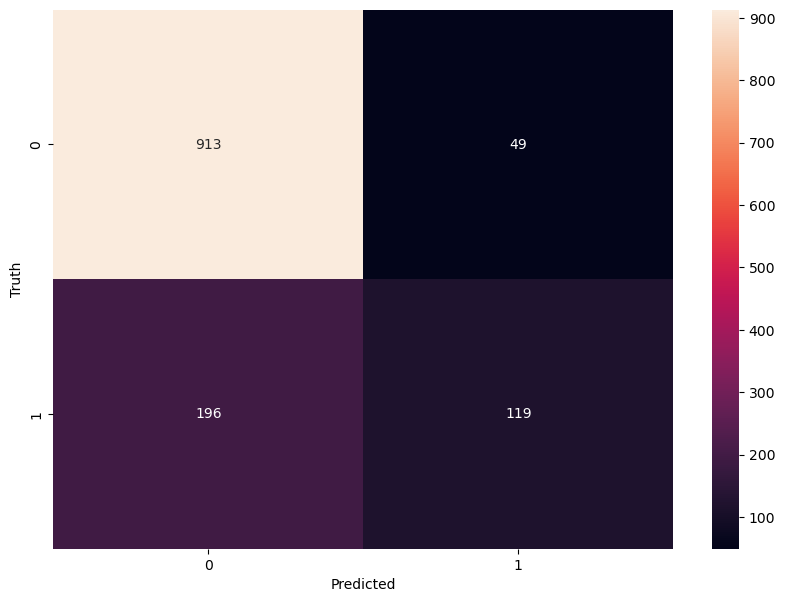

In [25]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Handling Imbalanced data using SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(sampling_strategy="minority")

X_smote, y_smote = smote.fit_resample(X, y)

In [33]:
y_smote.value_counts()

0    4846
1    4846
Name: Exited, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

In [35]:
y_train.value_counts()

1    3877
0    3876
Name: Exited, dtype: int64

In [36]:
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(12,), activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\jason\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5060 - loss: 0.7103
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6201 - loss: 0.6622
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.6346
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 0.6233
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - loss: 0.6175
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - loss: 0.6027
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6008
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 0.5867
Epoch 9/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7082 - loss: 0.5713
Epoch 10/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7065 - loss: 0.5701
Epoch 11/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7091 - loss: 0.5685
Epoch 12/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7525 - loss: 0.4950
Epoch 69/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7586 - loss: 0.4875
Epoch 70/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7569 - loss: 0.4918
Epoch 71/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7609 - loss: 0.4897
Epoch 72/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.4906
Epoch 73/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.4965
Epoch 74/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7487 - loss: 0.4973
Epoch 75/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7638 - loss: 0.4777
Epoch 76/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7581 - loss: 0.4845
Epoch 77/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7591 - loss: 0.4864
Epoch 78/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7667 - loss: 0.4882
Epoch 79/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]
print(classification_report(y_test, y_pred))

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       970
           1       0.78      0.73      0.76       969

    accuracy                           0.76      1939
   macro avg       0.77      0.76      0.76      1939
weighted avg       0.77      0.76      0.76      1939

